<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/230707_rnn_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB 긍정/부정 분류

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (_,_) = imdb.load_data(num_words=500)

In [3]:
train_input.shape, train_target.shape

((25000,), (25000,))

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(train_input, train_target, test_size=0.2)

In [5]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((20000,), (5000,), (20000,), (5000,))

In [6]:
np.array(train_input[0])

array([  1,   6,   2,   2, 346,   2,  10,  10,  12,  70,  79,   2,   2,
        33,   2,   2,   2,  54,   4,   2,   2,   7,   2,   2, 325,   2,
       216,  11,  18,  68,   2,   2,   2,  10,  10,  14,   2, 117,  22,
         6,   2,   7,   2, 102,   2,   6, 171,   2,  21, 117, 334,   2,
         2,   2,   2,  70,   2,   8,   2,  11,   6, 346,  58,   2,   2,
       395,   6,   2,   2,   2,   2,   2,   2,  76,   8,  81,  11,  14,
         2,   2, 239,   2,   4, 147,   2,   7,   2,   2,  54,   6, 171,
         7,   4,   2,   2,  79,  73, 371,   2,  19,   2,  10,  10, 400,
         2,  42,   2,   2,   4,  31,   5, 107,   2, 346,   2,  71,   2,
         8,   4,   2,  17,   2,   2,   2,  18, 162,  42,   2,   2, 199,
        11,   2, 496,   4, 370,   4,   2,  18,   2,   6,   2, 346,   2,
        16, 340, 275,  39,  15,   7,   6,   2,   2,  22, 142,   2,   8,
       487,   6,   2, 346,  65, 247,  74,   6,   2,   2,   8,   2,  11,
         2,   7, 199, 352,   2,   5,   2,   7,   2,   6,   2,   

In [8]:
review_len=np.array([len(x) for x in train_input])
review_len[:20]

array([194, 674, 109, 145, 279, 399, 184, 246, 256, 124, 188, 297,  26,
       313,  78, 190,  60, 139, 190,  41])

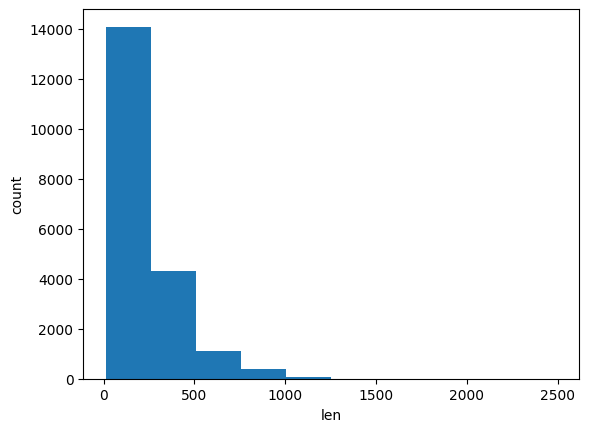

In [9]:
plt.hist(review_len)
plt.xlabel('len')
plt.ylabel('count')
plt.show()

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=200, padding='pre')
train_seq.shape

(20000, 200)

In [11]:
from tensorflow.keras.utils import to_categorical
train_oh = to_categorical(train_seq)
train_oh.shape

(20000, 200, 500)

In [ ]:
from keras import layers

model = keras.Sequential()
model.add(layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=(200,500)))
model.add(layers.LSTM(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(
    loss='bianry_crossentropy',
    optimizer='adam',
    metrics=['acuuracy']
)

In [ ]:
Epochs = 100
Batch = 32

history = model.fit(
    train_oh, train_target,
    epochs=Epochs,
    batch_size=Batch,
    validation_split=0.2,
    verbose=1
)

In [ ]:
test_seq = pad_sequences(test_input, maxlen=200, padding='pre')
test_oh = to_categorical(test_seq)

y_pred = model.predict(test_oh)

In [ ]:
y_pred = y_pred.reshape(-1)
y_pred = (y_pred > 0.5).astype('int')

In [ ]:
(y_pred == test_target).sum()/len(y_pred)

## embedding layer사용

In [12]:
from keras import layers

model = keras.Sequential()
model.add(layers.Embedding(500, 16, input_length=200)),
model.add(layers.LSTM(32, activation='tanh', return_sequences=True))
model.add(layers.LSTM(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 200, 32)           6272      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,625
Trainable params: 22,625
Non-trainable params: 0
_________________________________________________________________


In [13]:
opti = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(
    optimizer= opti,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 200, 32)           6272      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,625
Trainable params: 22,625
Non-trainable params: 0
_________________________________________________________________


In [14]:
%%time

EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    train_seq, train_target,
    epochs = EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose= 1
)

Epoch 1/10
500/500 [==============================] - 79s 152ms/step - loss: 0.5844 - accuracy: 0.6594 - val_loss: 0.4659 - val_accuracy: 0.7793
Epoch 2/10
500/500 [==============================] - 78s 157ms/step - loss: 0.4351 - accuracy: 0.8064 - val_loss: 0.4237 - val_accuracy: 0.8060
Epoch 3/10
500/500 [==============================] - 79s 158ms/step - loss: 0.4098 - accuracy: 0.8186 - val_loss: 0.4296 - val_accuracy: 0.8012
Epoch 4/10
500/500 [==============================] - 72s 145ms/step - loss: 0.3967 - accuracy: 0.8280 - val_loss: 0.4049 - val_accuracy: 0.8200
Epoch 5/10
500/500 [==============================] - 78s 157ms/step - loss: 0.3838 - accuracy: 0.8346 - val_loss: 0.4085 - val_accuracy: 0.8152
Epoch 6/10
500/500 [==============================] - 78s 155ms/step - loss: 0.3777 - accuracy: 0.8352 - val_loss: 0.3986 - val_accuracy: 0.8215
Epoch 7/10
500/500 [==============================] - 77s 154ms/step - loss: 0.3685 - accuracy: 0.8427 - val_loss: 0.3974 - val_ac